In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data2000.csv')
df

,GVKEY,LPERMCO,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,...,ceq,che,lt,ni,costat,mkvalt,dlrsn,gind,sic,dldte
0,1004,20000,31/05/2000,1999,INDL,C,D,STD,AIR,AAR CORP,...,339.515,1.241,401.483,35.163,A,372.7519,NaN,201010.0,5080,NaN
1,1004,20000,31/05/2001,2000,INDL,C,D,STD,AIR,AAR CORP,...,340.212,13.809,361.642,18.531,A,377.1180,NaN,201010.0,5080,NaN
2,1004,20000,31/05/2002,2001,INDL,C,D,STD,AIR,AAR CORP,...,310.235,34.522,399.964,-58.939,A,364.5928,NaN,201010.0,5080,NaN
3,1004,20000,31/05/2003,2002,INDL,C,D,STD,AIR,AAR CORP,...,294.988,29.154,391.633,-12.410,A,143.3295,NaN,201010.0,5080,NaN
4,1004,20000,31/05/2004,2003,INDL,C,D,STD,AIR,AAR CORP,...,301.684,41.010,407.608,3.504,A,308.9071,NaN,201010.0,5080,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117716,328795,56541,31/12/2018,2018,INDL,C,D,STD,ACA,ARCOSA INC,...,1684.500,99.400,487.700,75.700,A,1348.5030,NaN,201030.0,3440,NaN
117717,328795,56541,31/12/2019,2019,INDL,C,D,STD,ACA,ARCOSA INC,...,1790.400,240.400,512.100,113.300,A,2151.7650,NaN,201030.0,3440,NaN
117718,330227,56643,31/12/2019,2019,INDL,C,D,STD,CTRM,CASTOR MARITIME INC,...,13.204,4.559,17.217,1.088,A,6.1383,NaN,203030.0,4412,NaN
117719,331856,54835,31/12/2019,2019,INDL,C,D,STD,IMUX,IMMUNIC INC,...,58.363,29.369,7.592,-34.933,A,104.2265,NaN,352010.0,2836,NaN


In [3]:
df.columns

Index(['GVKEY', 'LPERMCO', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'tic', 'conm', 'curcd', 'ceq', 'che', 'lt', 'ni', 'costat',
       'mkvalt', 'dlrsn', 'gind', 'sic', 'dldte'],
      dtype='object')

In [4]:
# Drop the observations without suficient data for analysis
df = df.dropna(subset=['datadate','tic','ceq', 'che', 'lt', 'ni', 'costat','mkvalt','gind', 'sic'])

In [5]:
# Drop the companies that were deleted for different reasons than bankruptcy
for i in [1,4,5,6,7,8,9,10,11,12]:
    df.drop(df.loc[df['dlrsn']==i].index, inplace=True)

In [6]:
# Fill the Nans in Reason for Deletion column that correspond to non-bankrupt companies
df['dlrsn'] = df['dlrsn'].fillna(0)

In [7]:
# Observations of bankrupt companies
df.loc[df['dlrsn'].isin([2.0,3.0])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 1684 to 117401
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GVKEY     1350 non-null   int64  
 1   LPERMCO   1350 non-null   int64  
 2   datadate  1350 non-null   object 
 3   fyear     1350 non-null   int64  
 4   indfmt    1350 non-null   object 
 5   consol    1350 non-null   object 
 6   popsrc    1350 non-null   object 
 7   datafmt   1350 non-null   object 
 8   tic       1350 non-null   object 
 9   conm      1350 non-null   object 
 10  curcd     1350 non-null   object 
 11  ceq       1350 non-null   float64
 12  che       1350 non-null   float64
 13  lt        1350 non-null   float64
 14  ni        1350 non-null   float64
 15  costat    1350 non-null   object 
 16  mkvalt    1350 non-null   float64
 17  dlrsn     1350 non-null   float64
 18  gind      1350 non-null   float64
 19  sic       1350 non-null   int64  
 20  dldte     1350 non-null  

In [8]:
# Observations of non-bankrupt companies
df.loc[df['dlrsn'].isin([0])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55996 entries, 0 to 117720
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GVKEY     55996 non-null  int64  
 1   LPERMCO   55996 non-null  int64  
 2   datadate  55996 non-null  object 
 3   fyear     55996 non-null  int64  
 4   indfmt    55996 non-null  object 
 5   consol    55996 non-null  object 
 6   popsrc    55996 non-null  object 
 7   datafmt   55996 non-null  object 
 8   tic       55996 non-null  object 
 9   conm      55996 non-null  object 
 10  curcd     55996 non-null  object 
 11  ceq       55996 non-null  float64
 12  che       55996 non-null  float64
 13  lt        55996 non-null  float64
 14  ni        55996 non-null  float64
 15  costat    55996 non-null  object 
 16  mkvalt    55996 non-null  float64
 17  dlrsn     55996 non-null  float64
 18  gind      55996 non-null  float64
 19  sic       55996 non-null  int64  
 20  dldte     0 non-null      o

In [9]:
# Number of bankrupt companies
df.loc[df['dlrsn'].isin([2.0,3.0])]['tic'].nunique()

240

In [10]:
# Number of non-bankrupt companies
df.loc[df['dlrsn'].isin([0])]['tic'].nunique()

4942

In [11]:
# Codes to extract price data
lpermcos = df.LPERMCO.unique()

In [12]:
# Total number of companies
len(lpermcos)

5290

In [13]:
# USED TO DOWNLOAD THE PRICE DATA
#with open("outfile.txt", "w") as outfile:
#    outfile.write("\n".join(str(item) for item in lpermcos)) 

In [14]:
# Drop companies with only one observation throughout the timeframe (only one year of data)
df['count1'] = 1
df['count1'] = df.groupby(['LPERMCO']).transform(sum).count1
df.drop(df.index[df['count1'] == 1], inplace = True)

In [15]:
# Drop the company with no price data
df.drop(df.index[df['LPERMCO']==5614], inplace=True)

In [16]:
# Recalculating lpermcos after dropping rows
lpermcos = df.LPERMCO.unique()
len(lpermcos)

4956

In [17]:
# New number of bankrupt companies
df.loc[df['dlrsn'].isin([2.0,3.0])]['tic'].nunique()

218

In [18]:
# New number of non-bankrupt companies
df.loc[df['dlrsn'].isin([0])]['tic'].nunique()

4648

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57010 entries, 0 to 117717
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GVKEY     57010 non-null  int64  
 1   LPERMCO   57010 non-null  int64  
 2   datadate  57010 non-null  object 
 3   fyear     57010 non-null  int64  
 4   indfmt    57010 non-null  object 
 5   consol    57010 non-null  object 
 6   popsrc    57010 non-null  object 
 7   datafmt   57010 non-null  object 
 8   tic       57010 non-null  object 
 9   conm      57010 non-null  object 
 10  curcd     57010 non-null  object 
 11  ceq       57010 non-null  float64
 12  che       57010 non-null  float64
 13  lt        57010 non-null  float64
 14  ni        57010 non-null  float64
 15  costat    57010 non-null  object 
 16  mkvalt    57010 non-null  float64
 17  dlrsn     57010 non-null  float64
 18  gind      57010 non-null  float64
 19  sic       57010 non-null  int64  
 20  dldte     1328 non-null   o

# Price Data

In [20]:
price = pd.read_csv('prices1.csv')
print(price.info())
price.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750806 entries, 0 to 750805
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   GVKEY      750806 non-null  int64  
 1   LINKPRIM   750806 non-null  object 
 2   LIID       750806 non-null  int64  
 3   LINKTYPE   750806 non-null  object 
 4   LPERMNO    750806 non-null  int64  
 5   LPERMCO    750806 non-null  int64  
 6   LINKDT     750806 non-null  object 
 7   LINKENDDT  750806 non-null  object 
 8   iid        750806 non-null  int64  
 9   datadate   750806 non-null  object 
 10  tic        750806 non-null  object 
 11  conm       750806 non-null  object 
 12  prccm      750789 non-null  float64
 13  cshoq      237102 non-null  float64
 14  ccmbegdt   750806 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 85.9+ MB
None


,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,datadate,tic,conm,prccm,cshoq,ccmbegdt
0,1004,P,1,LU,54594,20000,24/04/1972,E,1,28/02/2006,AIR,AAR CORP,25.31,36.348,01/03/2005
1,1004,P,1,LU,54594,20000,24/04/1972,E,1,31/07/2004,AIR,AAR CORP,10.40,NaN,01/08/2003
2,1004,P,1,LU,54594,20000,24/04/1972,E,1,30/06/2004,AIR,AAR CORP,11.35,NaN,01/07/2003
3,1004,P,1,LU,54594,20000,24/04/1972,E,1,30/06/2005,AIR,AAR CORP,15.71,NaN,01/07/2004
4,1004,P,1,LU,54594,20000,24/04/1972,E,1,30/06/2001,AIR,AAR CORP,17.10,NaN,01/07/2000


In [21]:
# Number of unique companies price data
lpermco_price = price.LPERMCO.unique()
len(lpermco_price)

5289

In [22]:
# Number of unique non-bankrupt companies price data
df.loc[df['LPERMCO'].isin(lpermco_price)].loc[df['dlrsn'].isin([0])]['LPERMCO'].nunique()

4735

In [23]:
# Number of unique bankrupt companies price data
df.loc[df['LPERMCO'].isin(lpermco_price)].loc[df['dlrsn'].isin([2.0,3.0])]['LPERMCO'].nunique()

221

In [24]:
# Companies that exist in price data set and not in accounting data set
diff = [item for item in lpermco_price if item not in lpermcos]

In [25]:
# Companies that exist in accounting data set and not in price data set
diff2 = [item for item in lpermcos if item not in lpermco_price]

In [26]:
# Check if difference between price data set and diff list equals accounting data set
len(lpermco_price) - len(diff) == len(lpermcos)

True

In [27]:
# Drop companies in price data set but not in accounting data set
for i in diff:
    price.drop(price.index[price['LPERMCO'] == i], inplace=True)

In [28]:
# Check if final number of companies is the same in the two data sets
lpermco_price2 = price.LPERMCO.unique()
len(lpermco_price2) == len(lpermcos)

True

In [29]:
# Create copy of price data set to overwrite the Shares Outstanding column
price2 = price

In [30]:
# Put mean of Shares Outstanding for each company in cshoq column
price2['cshoq'] = price2.groupby('LPERMCO')['cshoq'].transform('mean')

In [31]:
price2.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,datadate,tic,conm,prccm,cshoq,ccmbegdt
0,1004,P,1,LU,54594,20000,24/04/1972,E,1,28/02/2006,AIR,AAR CORP,25.31,35.420788,01/03/2005
1,1004,P,1,LU,54594,20000,24/04/1972,E,1,31/07/2004,AIR,AAR CORP,10.40,35.420788,01/08/2003
2,1004,P,1,LU,54594,20000,24/04/1972,E,1,30/06/2004,AIR,AAR CORP,11.35,35.420788,01/07/2003
3,1004,P,1,LU,54594,20000,24/04/1972,E,1,30/06/2005,AIR,AAR CORP,15.71,35.420788,01/07/2004
4,1004,P,1,LU,54594,20000,24/04/1972,E,1,30/06/2001,AIR,AAR CORP,17.10,35.420788,01/07/2000


In [32]:
# Check if it worked with one random company
print(price.loc[price['tic']=='BMMI']['cshoq'].mean())
price2.loc[price2['tic']=='BMMI']

27.172071428571424


,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,datadate,tic,conm,prccm,cshoq,ccmbegdt
16101,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,30/06/2003,BMMI,BMC INDUSTRIES INC,0.5400,27.172071,01/07/2002
16102,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,31/07/2003,BMMI,BMC INDUSTRIES INC,0.4000,27.172071,01/08/2002
16103,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,31/05/2003,BMMI,BMC INDUSTRIES INC,0.9200,27.172071,01/06/2002
16104,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,30/04/2003,BMMI,BMC INDUSTRIES INC,1.4500,27.172071,01/05/2002
16105,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,31/03/2003,BMMI,BMC INDUSTRIES INC,1.3100,27.172071,01/04/2002
16106,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,28/02/2003,BMMI,BMC INDUSTRIES INC,1.5600,27.172071,01/03/2002
16107,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,31/01/2003,BMMI,BMC INDUSTRIES INC,1.6500,27.172071,01/02/2002
16108,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,31/12/2002,BMMI,BMC INDUSTRIES INC,1.5700,27.172071,01/01/2002
16109,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,30/11/2002,BMMI,BMC INDUSTRIES INC,1.8500,27.172071,01/12/2001
16110,1943,P,1,LU,65496,458,14/12/1972,18/08/2003,1,31/10/2002,BMMI,BMC INDUSTRIES INC,1.1000,27.172071,01/11/2001


# Variable Creation (Accounting)

In [33]:
df.head()

,GVKEY,LPERMCO,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,...,che,lt,ni,costat,mkvalt,dlrsn,gind,sic,dldte,count1
0,1004,20000,31/05/2000,1999,INDL,C,D,STD,AIR,AAR CORP,...,1.241,401.483,35.163,A,372.7519,0.0,201010.0,5080,NaN,20
1,1004,20000,31/05/2001,2000,INDL,C,D,STD,AIR,AAR CORP,...,13.809,361.642,18.531,A,377.1180,0.0,201010.0,5080,NaN,20
2,1004,20000,31/05/2002,2001,INDL,C,D,STD,AIR,AAR CORP,...,34.522,399.964,-58.939,A,364.5928,0.0,201010.0,5080,NaN,20
3,1004,20000,31/05/2003,2002,INDL,C,D,STD,AIR,AAR CORP,...,29.154,391.633,-12.410,A,143.3295,0.0,201010.0,5080,NaN,20
4,1004,20000,31/05/2004,2003,INDL,C,D,STD,AIR,AAR CORP,...,41.010,407.608,3.504,A,308.9071,0.0,201010.0,5080,NaN,20


In [34]:
acc = df[['LPERMCO','datadate','fyear','tic','conm','ceq', 'che', 'lt', 'ni',
          'mkvalt', 'dlrsn', 'gind', 'sic', 'dldte']]
acc.head()

,LPERMCO,datadate,fyear,tic,conm,ceq,che,lt,ni,mkvalt,dlrsn,gind,sic,dldte
0,20000,31/05/2000,1999,AIR,AAR CORP,339.515,1.241,401.483,35.163,372.7519,0.0,201010.0,5080,NaN
1,20000,31/05/2001,2000,AIR,AAR CORP,340.212,13.809,361.642,18.531,377.1180,0.0,201010.0,5080,NaN
2,20000,31/05/2002,2001,AIR,AAR CORP,310.235,34.522,399.964,-58.939,364.5928,0.0,201010.0,5080,NaN
3,20000,31/05/2003,2002,AIR,AAR CORP,294.988,29.154,391.633,-12.410,143.3295,0.0,201010.0,5080,NaN
4,20000,31/05/2004,2003,AIR,AAR CORP,301.684,41.010,407.608,3.504,308.9071,0.0,201010.0,5080,NaN


In [35]:
# Add 10% of diff between MVE-BVE to BVE (according to Campbell et al. (2008))
acc['diff'] = 0.1*(acc['mkvalt']-acc['ceq'])
acc['ceq'] = acc['ceq']+acc['diff']
acc.drop(columns=['diff'], inplace=True)

In [36]:
# Percentage of firm-years have negative book value of equity
round(acc.loc[acc['ceq']<0]['LPERMCO'].count()/acc['LPERMCO'].count(),3)

0.029

In [37]:
# Substitute all negative BVE by +1$ (according to Campbell et al. (2008))
acc.ceq = np.where(acc.ceq < 0, 1,acc.ceq)

In [38]:
# Create Variables
acc['MTA'] = acc['mkvalt']+acc['lt']
acc['NIMTA'] = acc['ni']/acc['MTA']
acc['TLMTA'] = acc['lt']/acc['MTA']
acc['CASHMTA'] = acc['che']/acc['MTA']
acc['MB'] = acc['mkvalt']/acc['ceq']

In [39]:
# Get only two digit industry Code
acc['gind'] = acc['gind'].astype(str)
acc['gind'] = acc['gind'].str[:2]

In [40]:
acc.head()

,LPERMCO,datadate,fyear,tic,conm,ceq,che,lt,ni,mkvalt,dlrsn,gind,sic,dldte,MTA,NIMTA,TLMTA,CASHMTA,MB
0,20000,31/05/2000,1999,AIR,AAR CORP,342.83869,1.241,401.483,35.163,372.7519,0.0,20,5080,NaN,774.2349,0.045416,0.518555,0.001603,1.087252
1,20000,31/05/2001,2000,AIR,AAR CORP,343.90260,13.809,361.642,18.531,377.1180,0.0,20,5080,NaN,738.7600,0.025084,0.489526,0.018692,1.096584
2,20000,31/05/2002,2001,AIR,AAR CORP,315.67078,34.522,399.964,-58.939,364.5928,0.0,20,5080,NaN,764.5568,-0.077089,0.523132,0.045153,1.154978
3,20000,31/05/2003,2002,AIR,AAR CORP,279.82215,29.154,391.633,-12.410,143.3295,0.0,20,5080,NaN,534.9625,-0.023198,0.732076,0.054497,0.512216
4,20000,31/05/2004,2003,AIR,AAR CORP,302.40631,41.010,407.608,3.504,308.9071,0.0,20,5080,NaN,716.5151,0.004890,0.568876,0.057235,1.021497


In [41]:
# Transform the 2 deletion reasons considered bankruptcy as "1" for bankrupt
acc.dlrsn = np.where(acc.dlrsn > 1, 1,acc.dlrsn)

In [42]:
acc.loc[acc['dlrsn']==1].head()

,LPERMCO,datadate,fyear,tic,conm,ceq,che,lt,ni,mkvalt,dlrsn,gind,sic,dldte,MTA,NIMTA,TLMTA,CASHMTA,MB
1684,20215,31/12/2000,2000,3ACKH,ARMSTRONG HOLDINGS INC,607.01428,156.500,3202.600,12.200,84.2428,1.0,20,3089,13/12/2007,3286.8428,0.003712,0.974370,0.047614,0.138782
1685,20215,31/12/2001,2001,3ACKH,ARMSTRONG HOLDINGS INC,698.23938,277.400,3265.200,92.800,138.7938,1.0,20,3089,13/12/2007,3403.9938,0.027262,0.959226,0.081493,0.198777
2027,458,31/12/2000,2000,BMMI,BMC INDUSTRIES INC,145.47521,2.290,227.006,14.900,133.5701,1.0,20,3470,16/02/2006,360.5761,0.041323,0.629565,0.006351,0.918164
2028,458,31/12/2001,2001,BMMI,BMC INDUSTRIES INC,110.40336,1.941,215.235,-22.600,55.4346,1.0,20,3470,16/02/2006,270.6696,-0.083497,0.795195,0.007171,0.502110
2029,458,31/12/2002,2002,BMMI,BMC INDUSTRIES INC,57.78046,1.635,187.880,-61.887,42.4936,1.0,20,3470,16/02/2006,230.3736,-0.268638,0.815545,0.007097,0.735432


In [43]:
acc=acc.rename(columns = {'LPERMCO':'PERMCO', 'datadate':'date'})

In [44]:
acc['date'] = pd.to_datetime(acc['date'])

In [45]:
acc.head()

,PERMCO,date,fyear,tic,conm,ceq,che,lt,ni,mkvalt,dlrsn,gind,sic,dldte,MTA,NIMTA,TLMTA,CASHMTA,MB
0,20000,2000-05-31,1999,AIR,AAR CORP,342.83869,1.241,401.483,35.163,372.7519,0.0,20,5080,NaN,774.2349,0.045416,0.518555,0.001603,1.087252
1,20000,2001-05-31,2000,AIR,AAR CORP,343.90260,13.809,361.642,18.531,377.1180,0.0,20,5080,NaN,738.7600,0.025084,0.489526,0.018692,1.096584
2,20000,2002-05-31,2001,AIR,AAR CORP,315.67078,34.522,399.964,-58.939,364.5928,0.0,20,5080,NaN,764.5568,-0.077089,0.523132,0.045153,1.154978
3,20000,2003-05-31,2002,AIR,AAR CORP,279.82215,29.154,391.633,-12.410,143.3295,0.0,20,5080,NaN,534.9625,-0.023198,0.732076,0.054497,0.512216
4,20000,2004-05-31,2003,AIR,AAR CORP,302.40631,41.010,407.608,3.504,308.9071,0.0,20,5080,NaN,716.5151,0.004890,0.568876,0.057235,1.021497


In [46]:
acc = acc[df['fyear']!=1999]

# New Market Data & Variable Creation

In [47]:
market = pd.read_csv('prices2.csv')
print(market.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751479 entries, 0 to 751478
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PERMNO  751479 non-null  int64  
 1   date    751479 non-null  object 
 2   TICKER  734730 non-null  object 
 3   PERMCO  751479 non-null  int64  
 4   PRC     733475 non-null  float64
 5   SHROUT  748839 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 34.4+ MB
None


In [48]:
market['PRC'] = market['PRC'].abs()

In [49]:
market['date'] = pd.to_datetime(market['date'])

In [50]:
market.insert(2,'fyear',np.nan)
market['fyear'] = market['date'].dt.year

In [51]:
market['RET_All'] = np.log(market.PRC/market.PRC.shift(1))

In [52]:
std = market.groupby(['PERMCO','fyear'])['RET_All'].std()

In [53]:
market

,PERMNO,date,fyear,TICKER,PERMCO,PRC,SHROUT,RET_All
0,15580,2000-01-31,2000,AAME,5,2.5625,21027.0,NaN
1,15580,2000-02-29,2000,AAME,5,2.5000,21027.0,-0.024693
2,15580,2000-03-31,2000,AAME,5,2.6875,21021.0,0.072321
3,15580,2000-04-28,2000,AAME,5,2.6875,21021.0,0.000000
4,15580,2000-05-31,2000,AAME,5,3.3125,21025.0,0.209092
...,...,...,...,...,...,...,...,...
751474,18322,2019-08-30,2019,WRTC,56617,4.1500,29657.0,-0.149666
751475,18322,2019-09-30,2019,WRTC,56617,4.0800,29669.0,-0.017011
751476,18322,2019-10-31,2019,WRTC,56617,3.9300,29669.0,-0.037458
751477,18322,2019-11-29,2019,WRTC,56617,4.5700,29669.0,0.150874


In [54]:
market.drop(columns=['RET_All'], inplace=True)

In [55]:
market = pd.merge(market, std, on = ['PERMCO','fyear'], how = 'left')

In [56]:
market.columns = ['PERMNO', 'date', 'fyear', 'TICKER', 'PERMCO', 'PRC', 'SHROUT', 'SIGMA']

In [57]:
market.head()

,PERMNO,date,fyear,TICKER,PERMCO,PRC,SHROUT,SIGMA
0,15580,2000-01-31,2000,AAME,5,2.5625,21027.0,0.153243
1,15580,2000-02-29,2000,AAME,5,2.5000,21027.0,0.153243
2,15580,2000-03-31,2000,AAME,5,2.6875,21021.0,0.153243
3,15580,2000-04-28,2000,AAME,5,2.6875,21021.0,0.153243
4,15580,2000-05-31,2000,AAME,5,3.3125,21025.0,0.153243


In [58]:
market.query("date.dt.month < 2 | date.dt.month > 11", inplace=True)

In [59]:
market.head()

,PERMNO,date,fyear,TICKER,PERMCO,PRC,SHROUT,SIGMA
0,15580,2000-01-31,2000,AAME,5,2.5625,21027.0,0.153243
11,15580,2000-12-29,2000,AAME,5,2.0000,21157.0,0.153243
12,15580,2001-01-31,2001,AAME,5,2.0000,21157.0,0.137694
23,15580,2001-12-31,2001,AAME,5,2.2040,21246.0,0.137694
24,15580,2002-01-31,2002,AAME,5,2.3500,21246.0,0.082991


In [60]:
# PERMCOS of companies to delete because of nan values
delete = market[market['PRC'].isnull()]['PERMCO'].unique()

In [61]:
len(delete)

717

In [62]:
# Drop companies in accounting df with nans in market data
for i in delete:
    market.drop(market.index[market['PERMCO']==i], inplace=True)

In [63]:
market[market['SIGMA'].isnull()]['PERMCO'].nunique()

508

In [64]:
delete = np.append(delete, (market[market['SIGMA'].isnull()]['PERMCO'].unique()))

In [65]:
len(delete)

1225

In [66]:
# Drop companies in accounting df with nans in market data
for i in delete:
    market.drop(market.index[market['PERMCO']==i], inplace=True)

In [67]:
# Drop companies in accounting df with nans in market data
for i in delete:
    acc.drop(acc.index[acc['PERMCO']==i], inplace=True)

In [68]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99240 entries, 0 to 751259
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PERMNO  99240 non-null  int64         
 1   date    99240 non-null  datetime64[ns]
 2   fyear   99240 non-null  int64         
 3   TICKER  99240 non-null  object        
 4   PERMCO  99240 non-null  int64         
 5   PRC     99240 non-null  float64       
 6   SHROUT  99240 non-null  float64       
 7   SIGMA   99240 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 6.8+ MB


In [69]:
# Number of unique companies price data
permco_market = market['PERMCO'].nunique()
permco_market

3731

## RSIZE and EXRET

In [70]:
market['RET'] = np.log(market.PRC/market.PRC.shift(1))

In [71]:
market['PRICE'] = np.where(market['PRC']>15, np.log(15), np.log(market['PRC']))

In [72]:
market.query("date.dt.month == 12", inplace=True)

In [73]:
market

,PERMNO,date,fyear,TICKER,PERMCO,PRC,SHROUT,SIGMA,RET,PRICE
11,15580,2000-12-29,2000,AAME,5,2.000,21157.0,0.153243,-0.247836,0.693147
23,15580,2001-12-31,2001,AAME,5,2.204,21246.0,0.137694,0.097127,0.790274
35,15580,2002-12-31,2002,AAME,5,1.630,21374.0,0.082991,-0.365835,0.488580
47,15580,2003-12-31,2003,AAME,5,3.000,21199.0,0.133646,0.622378,1.098612
59,15580,2004-12-31,2004,AAME,5,3.100,21213.0,0.066183,0.000000,1.131402
...,...,...,...,...,...,...,...,...,...,...
751227,18210,2019-12-31,2019,PHAS,56569,6.110,28766.0,0.488718,0.616004,1.809927
751231,18212,2018-12-31,2018,SIBN,56571,20.890,24451.0,0.137299,1.229344,2.708050
751243,18212,2019-12-31,2019,SIBN,56571,21.500,25005.0,0.125526,0.178793,2.708050
751247,18213,2018-12-31,2018,STNE,56572,18.440,125697.0,0.034562,-0.153531,2.708050


In [74]:
market['count1'] = 1
market['count1'] = market.groupby(['PERMCO']).transform(sum).count1

In [75]:
delete2 = market[market.count1>20]['PERMCO'].unique()

In [76]:
# Drop companies in accounting df with nans in market data
for i in delete2:
    market.drop(market.index[market['PERMCO']==i], inplace=True)

In [77]:
# Drop companies in accounting df with nans in market data
for i in delete2:
    acc.drop(acc.index[acc['PERMCO']==i], inplace=True)

In [78]:
market['MCAP'] = market['PRC']*market['SHROUT']

In [79]:
sp500 = pd.read_excel('sp500.xlsx')
print(sp500.info())
sp500

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              240 non-null    datetime64[ns]
 1   S&P 500 COMPOSITE - MARKET VALUE  240 non-null    int64         
 2   SPDR S&P 500 ETF TRUST            240 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.8 KB
None


,date,S&P 500 COMPOSITE - MARKET VALUE,SPDR S&P 500 ETF TRUST
0,2000-01-31,11739680000,139.6250
1,2000-02-29,11532090000,137.4375
2,2000-03-31,12686010000,150.3750
3,2000-04-28,12353750000,145.0938
4,2000-05-31,12125070000,142.8125
...,...,...,...
235,2019-08-30,24359220000,292.4500
236,2019-09-30,24706910000,296.7700
237,2019-10-31,25228180000,303.3301
238,2019-11-29,26098050000,314.3101


In [80]:
sp500.columns = ['date', 'SPMCAP', 'SPPRC']

In [81]:
sp500['date'] = pd.to_datetime(sp500['date'])
sp500.query("date.dt.month < 2 | date.dt.month > 11", inplace=True)

In [82]:
sp500['SPRET'] = np.log(sp500.SPPRC/sp500.SPPRC.shift(1))

In [83]:
sp500.query("date.dt.month == 12", inplace=True)

In [84]:
merge_market = pd.merge(market, sp500, on = 'date', how = 'left')

In [85]:
sp500

,date,SPMCAP,SPPRC,SPRET
11,2000-12-29,11713750000,131.1875,-0.062333
23,2001-12-31,10463410000,114.3000,-0.181300
35,2002-12-31,8107397000,88.2300,-0.249032
47,2003-12-31,10286250000,111.2800,0.257005
59,2004-12-31,11288570000,120.8700,0.063089
71,2005-12-30,11258050000,124.5100,0.052346
83,2006-12-29,12729100000,141.6200,0.105031
95,2007-12-31,12867850000,146.2100,0.016968
107,2008-12-31,7851857000,90.2400,-0.420205
119,2009-12-31,9927564000,111.4400,0.296696


In [86]:
merge_market['RSIZE'] = np.log(merge_market['MCAP']/merge_market['SPMCAP'])

In [87]:
merge_market['EXRET'] = merge_market['RET']-merge_market['SPRET']

In [88]:
merge_market.head()

,PERMNO,date,fyear,TICKER,PERMCO,PRC,SHROUT,SIGMA,RET,PRICE,count1,MCAP,SPMCAP,SPPRC,SPRET,RSIZE,EXRET
0,15580,2000-12-29,2000,AAME,5,2.000,21157.0,0.153243,-0.247836,0.693147,20,42314.000,11713750000,131.1875,-0.062333,-12.531156,-0.185504
1,15580,2001-12-31,2001,AAME,5,2.204,21246.0,0.137694,0.097127,0.790274,20,46826.184,10463410000,114.3000,-0.181300,-12.316952,0.278427
2,15580,2002-12-31,2002,AAME,5,1.630,21374.0,0.082991,-0.365835,0.488580,20,34839.620,8107397000,88.2300,-0.249032,-12.357532,-0.116803
3,15580,2003-12-31,2003,AAME,5,3.000,21199.0,0.133646,0.622378,1.098612,20,63597.000,10286250000,111.2800,0.257005,-11.993752,0.365373
4,15580,2004-12-31,2004,AAME,5,3.100,21213.0,0.066183,0.000000,1.131402,20,65760.300,11288570000,120.8700,0.063089,-12.053285,-0.063089


# Merge DF

In [89]:
np.unique(np.array(merge_market.groupby('PERMCO')['fyear'].count()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [201]:
merge_df = pd.merge(acc, merge_market, on = ['PERMCO','fyear'], how = 'left')

In [202]:
merge_df

,PERMCO,date_x,fyear,tic,conm,ceq,che,lt,ni,mkvalt,...,SIGMA,RET,PRICE,count1,MCAP,SPMCAP,SPPRC,SPRET,RSIZE,EXRET
0,20000,2001-05-31,2000,AIR,AAR CORP,343.90260,13.809,361.642,18.531,377.1180,...,0.179949,-0.337179,2.535679,20.0,339057.00,1.171375e+10,131.1875,-0.062333,-10.450106,-0.274847
1,20000,2002-05-31,2001,AIR,AAR CORP,315.67078,34.522,399.964,-58.939,364.5928,...,0.258928,-0.522302,2.198335,20.0,242891.58,1.046341e+10,114.3000,-0.181300,-10.670780,-0.341002
2,20000,2003-05-31,2002,AIR,AAR CORP,279.82215,29.154,391.633,-12.410,143.3295,...,0.226402,-0.512765,1.638997,20.0,164001.75,8.107397e+09,88.2300,-0.249032,-10.808410,-0.263733
3,20000,2004-05-31,2003,AIR,AAR CORP,302.40631,41.010,407.608,3.504,308.9071,...,0.193206,1.144464,2.704711,20.0,476112.65,1.028625e+10,111.2800,0.257005,-9.980664,0.887459
4,20000,2005-05-31,2004,AIR,AAR CORP,335.53754,50.338,417.486,15.453,522.6794,...,0.113530,0.020023,2.611539,20.0,439190.52,1.128857e+10,120.8700,0.063089,-10.154368,-0.043066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45136,54852,2019-03-31,2018,LPG,DORIAN LPG LTD,856.83256,31.439,712.687,-50.946,354.1786,...,0.091356,-0.270381,1.763017,6.0,321623.61,2.102690e+10,249.9200,-0.120411,-11.087931,-0.149969
45137,56329,2018-12-31,2018,NVT,NVENT ELECTRIC PLC,2816.43510,159.000,1865.600,230.800,3980.4510,...,0.075005,0.799201,2.708050,2.0,4029907.96,2.102690e+10,249.9200,-0.120411,-8.559814,0.919612
45138,56329,2019-12-31,2019,NVT,NVENT ELECTRIC PLC,2766.81309,106.400,2047.800,222.700,4335.6309,...,0.103867,0.022135,2.708050,2.0,4326857.00,2.675968e+10,321.8601,0.175955,-8.729810,-0.153819
45139,56407,2018-12-31,2018,GRIN,GRINDROD SHIPPING,275.14864,35.636,155.124,-20.640,118.9594,...,0.191229,-1.705622,1.830980,2.0,118959.36,2.102690e+10,249.9200,-0.120411,-12.082531,-1.585211


In [203]:
merge_df[merge_df['SPMCAP'].isnull()] #['PERMCO'].unique()

,PERMCO,date_x,fyear,tic,conm,ceq,che,lt,ni,mkvalt,...,SIGMA,RET,PRICE,count1,MCAP,SPMCAP,SPPRC,SPRET,RSIZE,EXRET
232,5348,2011-06-30,2011,ALAN,ALANCO TECHNOLOGIES INC,6.19023,7.420,0.581,-0.058,9.5043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3987,6863,2016-12-31,2016,ENZN,ENZON PHARMACEUTICALS INC,10.91175,7.639,0.940,-1.126,16.1385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3988,6863,2017-12-31,2017,ENZN,ENZON PHARMACEUTICALS INC,9.42341,7.478,0.368,5.445,11.9381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3989,6863,2018-12-31,2018,ENZN,ENZON PHARMACEUTICALS INC,14.60792,6.500,0.517,5.849,11.1422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3990,6863,2019-12-31,2019,ENZN,ENZON PHARMACEUTICALS INC,6.36033,5.446,0.423,-0.979,9.1083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45062,53726,2018-06-30,2018,MNELF,MISSION NEWENERGY LTD,0.44393,0.145,0.152,-0.149,4.4753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45063,53726,2019-06-30,2019,MNELF,MISSION NEWENERGY LTD,0.04006,0.121,0.121,0.008,0.3556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45070,51093,2012-12-31,2012,ENVS,ENOVA SYSTEMS INC,1.00000,0.057,5.689,-8.235,0.7123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45071,51093,2013-12-31,2013,ENVS,ENOVA SYSTEMS INC,1.00000,0.001,6.072,-2.904,0.3606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
merge_df.columns

Index(['PERMCO', 'date_x', 'fyear', 'tic', 'conm', 'ceq', 'che', 'lt', 'ni',
       'mkvalt', 'dlrsn', 'gind', 'sic', 'dldte', 'MTA', 'NIMTA', 'TLMTA',
       'CASHMTA', 'MB', 'PERMNO', 'date_y', 'TICKER', 'PRC', 'SHROUT', 'SIGMA',
       'RET', 'PRICE', 'count1', 'MCAP', 'SPMCAP', 'SPPRC', 'SPRET', 'RSIZE',
       'EXRET'],
      dtype='object')

In [205]:
merge_df = merge_df.dropna(subset=['NIMTA', 'TLMTA','CASHMTA', 'MB','PRC', 'SHROUT', 'SIGMA','RET','PRICE', 'MCAP', 'SPMCAP', 'SPPRC', 'SPRET', 'RSIZE', 'EXRET', ])

In [206]:
merge_df.drop(columns=['date_x','ceq', 'che', 'lt', 'ni','mkvalt', 'sic', 'dldte', 'MTA', 'PERMNO', 'date_y',
                       'TICKER', 'PRC', 'SHROUT','RET', 'MCAP', 'SPMCAP', 'SPPRC', 'SPRET', 'count1'], inplace=True)

In [207]:
bankr = merge_df[merge_df['dlrsn']==1.0]['PERMCO'].unique()

In [208]:
bankr

array([20215,   458, 20299,  6438, 20376,  7636, 27785, 20426, 20439,
       20450, 20481, 13401,  4609, 20685, 20693, 20723, 20736,  1693,
       20875, 20987,  6785, 11041,  6121, 21374,  5358,  7946,  6377,
       21586,  4090,  4230,  4275,  4373, 21744,  7969,  7801, 20837,
        8760,  8527,  6968, 20034, 20732, 20242, 54374, 10270,  7911,
        2343,  8325, 36363, 10579, 10961, 11245, 11281, 16476, 11655,
       11724, 11832, 13041, 11961, 11908, 29745, 12127, 12234, 12291,
       12335, 12332, 12452, 12467, 12482, 12639, 13019, 13094, 13110,
       30430, 13239, 30823, 13594, 13712, 30911, 15982, 50690, 14203,
       14335, 14381, 14480, 14910, 15031, 15293, 15295, 16436, 15597,
       15608, 15612, 36611, 32159, 17451, 15974, 16011, 16015, 16071,
       38385, 34753, 16755, 34769, 16171, 46861, 34897, 16475, 16518,
       16628, 16647, 35192, 16691, 44492, 17185, 17164, 17207, 17216,
       17403, 17524, 53066, 37745, 42918, 37919, 38402, 38415, 38434,
       51091, 39160,

In [209]:
merge_df['dlrsn'] = 0.0

In [210]:
merge_df

,PERMCO,fyear,tic,conm,dlrsn,gind,NIMTA,TLMTA,CASHMTA,MB,SIGMA,PRICE,RSIZE,EXRET
0,20000,2000,AIR,AAR CORP,0.0,20,0.025084,0.489526,0.018692,1.096584,0.179949,2.535679,-10.450106,-0.274847
1,20000,2001,AIR,AAR CORP,0.0,20,-0.077089,0.523132,0.045153,1.154978,0.258928,2.198335,-10.670780,-0.341002
2,20000,2002,AIR,AAR CORP,0.0,20,-0.023198,0.732076,0.054497,0.512216,0.226402,1.638997,-10.808410,-0.263733
3,20000,2003,AIR,AAR CORP,0.0,20,0.004890,0.568876,0.057235,1.021497,0.193206,2.704711,-9.980664,0.887459
4,20000,2004,AIR,AAR CORP,0.0,20,0.016436,0.444056,0.053542,1.557737,0.113530,2.611539,-10.154368,-0.043066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45136,54852,2018,LPG,DORIAN LPG LTD,0.0,10,-0.047753,0.668019,0.029469,0.413358,0.091356,1.763017,-11.087931,-0.149969
45137,56329,2018,NVT,NVENT ELECTRIC PLC,0.0,20,0.039480,0.319121,0.027198,1.413294,0.075005,2.708050,-8.559814,0.919612
45138,56329,2019,NVT,NVENT ELECTRIC PLC,0.0,20,0.034887,0.320799,0.016668,1.567013,0.103867,2.708050,-8.729810,-0.153819
45139,56407,2018,GRIN,GRINDROD SHIPPING,0.0,20,-0.075306,0.565974,0.130019,0.432346,0.191229,1.830980,-12.082531,-1.585211


In [211]:
for i in bankr:
    wtv = merge_df[merge_df['PERMCO']==i]
    wtv.iloc[-1,4] = 1.0
    merge_df[merge_df['PERMCO']==i] = wtv

In [212]:
merge_df['count1'] = 1
merge_df['count1'] = merge_df.groupby('PERMCO').transform(sum).count1

In [213]:
less2 = merge_df[merge_df.count1<2]['PERMCO'].unique()

In [214]:
# Drop companies in with less than 2 years of data
for i in less2:
    merge_df.drop(merge_df.index[merge_df['PERMCO']==i], inplace=True)

In [215]:
merge_df.drop(columns=['count1'], inplace=True)

In [216]:
years = list(range(2000, 2020, +1))
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [217]:
from itertools import product
dfo = pd.DataFrame(list(product(merge_df['PERMCO'].unique(), years)),
                            columns=['PERMCO', 'fyear'])

In [218]:
np.unique(np.array(dfo.groupby('PERMCO')['fyear'].count()))

array([20])

In [219]:
dfo.groupby('PERMCO')['fyear'].count()

PERMCO
5        20
7        20
59       20
90       20
92       20
         ..
56564    20
56568    20
56569    20
56571    20
56572    20
Name: fyear, Length: 3684, dtype: int64

In [220]:
dfo = pd.merge(dfo, merge_df, on = ['PERMCO','fyear'], how = 'left')

In [221]:
#Find the companies that change gind through the timeline
np.where(dfo[['PERMCO', 'gind']].groupby('PERMCO')['gind'].nunique()!=1)

(array([1418, 3025]),)

In [222]:
#Find the companies that change gind through the timeline
x = dfo[['PERMCO', 'gind']].groupby('PERMCO')['gind'].nunique()

In [223]:
#Find the PERMCOS of the companies that change gind through the timeline
print(x[1421:1422])
print(x[3029:3030])

PERMCO
20875    1
Name: gind, dtype: int64
PERMCO
54883    1
Name: gind, dtype: int64


In [224]:
dfo.drop(dfo.index[dfo['PERMCO']==20851], inplace=True)
dfo.drop(dfo.index[dfo['PERMCO']==54879], inplace=True)

In [230]:
dfo['dlrsn'] = dfo.groupby('PERMCO')['dlrsn'].fillna(method='ffill')

In [232]:
dfo['dlrsn'] = dfo.groupby('PERMCO')['dlrsn'].fillna(method='bfill')

In [233]:
dfo[dfo['PERMCO']==46670]

,PERMCO,fyear,tic,conm,dlrsn,gind,NIMTA,TLMTA,CASHMTA,MB,SIGMA,PRICE,RSIZE,EXRET
73340,46670,2000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73341,46670,2001,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73342,46670,2002,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73343,46670,2003,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73344,46670,2004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73345,46670,2005,DUNRQ,DUNE ENERGY INC,0.0,10,-0.008506,0.234230,0.020146,5.157789,0.116729,1.043804,-11.275879,-1.413684
73346,46670,2006,DUNRQ,DUNE ENERGY INC,0.0,10,-0.262176,0.323140,0.017475,1124.964660,0.249005,0.845868,-11.429003,-0.657880
73347,46670,2007,DUNRQ,DUNE ENERGY INC,0.0,10,-0.048015,0.726652,0.028355,161.686300,0.099218,0.712950,-11.300533,-0.055435
73348,46670,2008,DUNRQ,DUNE ENERGY INC,0.0,10,-0.382647,0.953099,0.042007,17.297100,0.224628,-1.714798,-13.039522,-1.931170
73349,46670,2009,DUNRQ,DUNE ENERGY INC,1.0,10,-0.154861,0.976586,0.039423,8.940200,0.416758,-1.491655,-14.048934,0.174197


In [234]:
column_na = ['tic', 'conm', 'gind']
for column in column_na:
    # find lat 'tic' value for each 'PERMCO'
    lookup = dfo[['PERMCO', column]].groupby('PERMCO').last()[column]

    # only use rows where 'tic' is NaN
    nan_mask = dfo[column].isnull()

    # replace NaN values in 'tic' with lookup values
    dfo[column].loc[nan_mask] = dfo.loc[nan_mask].apply(lambda x: lookup[x['PERMCO']], axis=1)

In [235]:
dfo.fillna(0, inplace=True)

In [236]:
dfo['count1'] = 1.0
dfo['count1'] = dfo.groupby('PERMCO').transform(sum).count1

In [237]:
delete3 = dfo[dfo.count1>20]['PERMCO'].unique()

In [238]:
# Drop companies from dfo with more than 20 years (no idea how it happened)
for i in delete3:
    dfo.drop(dfo.index[dfo['PERMCO']==i], inplace=True)

In [239]:
# Drop companies from merge_df with more than 20 years (no idea how it happened)
for i in delete3:
    merge_df.drop(merge_df.index[merge_df['PERMCO']==i], inplace=True)

In [240]:
np.unique(np.array(dfo.groupby('PERMCO')['fyear'].count()))

array([20])

In [241]:
dfo.loc[dfo['dlrsn'].isin([1])]['PERMCO'].nunique()

144

In [242]:
dfo.loc[dfo['dlrsn'].isin([0])]['PERMCO'].nunique()

3662

In [243]:
dfo.drop(columns='count1', inplace=True)

# Tuesday (exploration)

In [132]:
bkr_py = merge_df[merge_df['dlrsn']==1].groupby('fyear').count()[['PERMCO']]

In [133]:
for i in list(range(2015,2020,1)):
    bkr_py.loc[i] = 0
bkr_py.loc[2000] = 0

In [134]:
bkr_py.sort_index(inplace=True)

In [135]:
bkr_py.columns = ['# Bankrupcties']

<AxesSubplot:title={'center':'Bankruptcies per year'}, xlabel='fyear'>

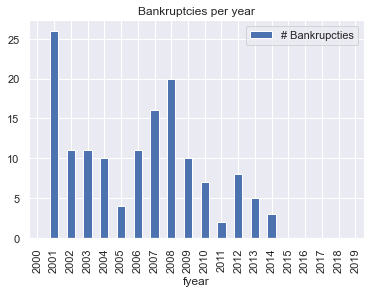

In [136]:
import seaborn as sns
sns.set()
bkr_py.plot(kind='bar', title = 'Bankruptcies per year')

<AxesSubplot:>

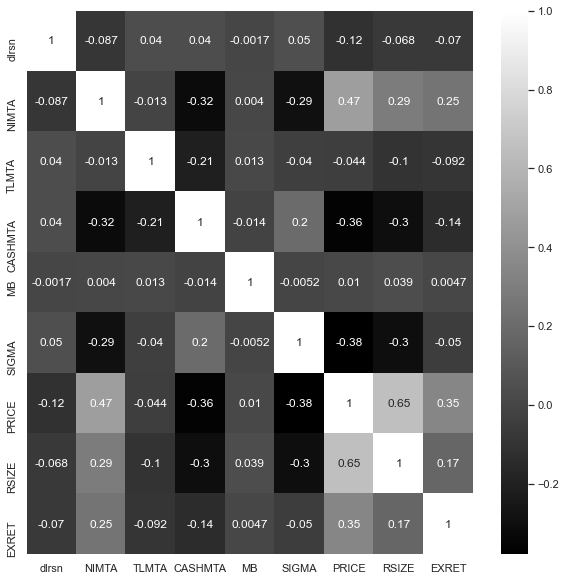

In [137]:
df_corr = merge_df[['dlrsn','NIMTA', 'TLMTA', 'CASHMTA', 'MB', 'SIGMA', 'PRICE', 'RSIZE', 'EXRET']]
corr = df_corr.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='gray')

In [191]:
df_shifts = merge_df

In [194]:
df_shifts['dlrsn_lag'] = df_shifts.groupby(['PERMCO'])['dlrsn'].shift(-1)

<AxesSubplot:>

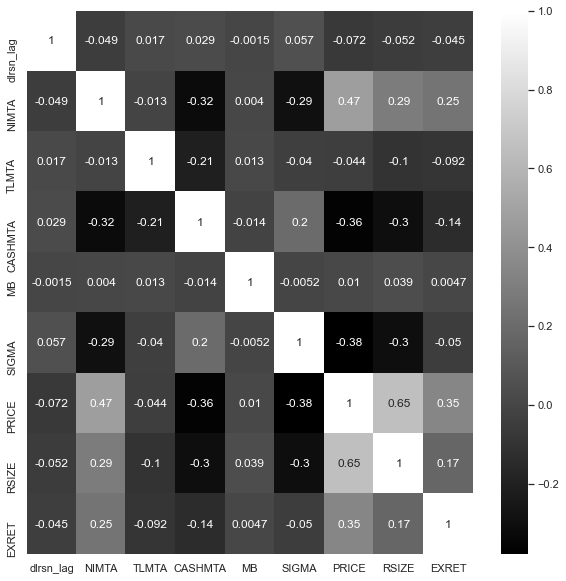

In [196]:
df_corrlag = df_shifts[['dlrsn_lag','NIMTA', 'TLMTA', 'CASHMTA', 'MB', 'SIGMA', 'PRICE', 'RSIZE', 'EXRET']]
corr_lag = df_corrlag.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_lag, annot=True, ax=ax, cmap='gray')

In [200]:
#merge_df.to_csv('dfo_nozeros.csv')

In [244]:
#dfo.to_csv('dfo.csv')

In [183]:
altmanper = merge_df['PERMCO'].unique()

In [184]:
len(altmanper)

3664

In [185]:
# USED TO DOWNLOAD THE ALTMAN DATA
#with open("outfile.txt", "w") as outfile:
    #outfile.write("\n".join(str(item) for item in altmanper)) 

In [189]:
# DLRSN for ALTMAN
dlrsn_alt = merge_df[['PERMCO','fyear','dlrsn']]

In [190]:
# DLRSN for ALTMAN
#dlrsn_alt.to_csv('dlrsn_alt.csv')

# Create Final DF

In [138]:
dlrsn = dfo.loc[:, ['PERMCO', 'fyear', 'dlrsn']]
NIMTA = dfo.loc[:, ['PERMCO', 'fyear', 'NIMTA']]
TLMTA = dfo.loc[:, ['PERMCO', 'fyear', 'TLMTA']]
CASHMTA = dfo.loc[:, ['PERMCO', 'fyear', 'CASHMTA']]
MB = dfo.loc[:, ['PERMCO', 'fyear', 'MB']]
SIGMA = dfo.loc[:, ['PERMCO', 'fyear', 'SIGMA']]
RSIZE = dfo.loc[:, ['PERMCO', 'fyear', 'RSIZE']]
EXRET = dfo.loc[:, ['PERMCO', 'fyear', 'EXRET']]
PRICE = dfo.loc[:, ['PERMCO', 'fyear', 'PRICE']]

In [139]:
varstr = ['dlrsn', 'NIMTA', 'TLMTA', 'CASHMTA', 'MB', 'SIGMA', 'RSIZE', 'EXRET', 'PRICE']
var = [dlrsn, NIMTA, TLMTA, CASHMTA, MB, SIGMA, RSIZE, EXRET, PRICE]
varcols = {c: [] for c in varstr}

In [140]:
for i in list(range(9)):
    var[i] = var[i].set_index(['PERMCO','fyear'])[varstr[i]].unstack()
    for y in years:
        varcols[varstr[i]].append('{}_{}'.format(varstr[i], y))
    var[i].columns = varcols[varstr[i]]

In [141]:
dlrsn = var[0]
NIMTA = var[1]
TLMTA = var[2]
CASHMTA = var[3]
MB = var[4]
SIGMA = var[5]
RSIZE = var[6]
EXRET = var[7]
PRICE = var[8]

In [142]:
X_df = var[1]
for df_ in var[2:]:
    X_df = X_df.merge(df_, on='PERMCO')

In [143]:
X_df.head()

,NIMTA_2000,NIMTA_2001,NIMTA_2002,NIMTA_2003,NIMTA_2004,NIMTA_2005,NIMTA_2006,NIMTA_2007,NIMTA_2008,NIMTA_2009,...,PRICE_2010,PRICE_2011,PRICE_2012,PRICE_2013,PRICE_2014,PRICE_2015,PRICE_2016,PRICE_2017,PRICE_2018,PRICE_2019
PERMCO,,,,,,,,,,,,,,,,,,,,,
5,0.010847,0.009687,-0.032162,0.016285,0.011216,-0.007254,0.020877,0.018085,-0.018689,-0.005663,...,0.708036,0.678034,1.128171,1.408545,1.393766,1.607436,1.410987,1.223775,0.879087,0.678034
7,0.069314,-0.003314,0.008774,0.006771,0.015213,0.027328,0.027225,0.024162,0.040449,0.045089,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050
59,0.019102,-0.020699,0.007884,0.013775,0.032645,0.051380,0.030659,0.045357,-0.027739,0.016044,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050
90,0.013034,0.007027,0.014093,0.013479,0.013946,0.022323,0.019502,0.020157,0.019882,0.013483,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,0.000000,0.000000,0.000000,2.708050
92,0.013304,0.015184,0.015159,0.012666,0.018088,0.000000,0.020008,0.000000,0.013329,0.000000,...,0.000000,2.708050,0.000000,0.000000,0.000000,2.708050,0.000000,0.000000,0.000000,2.708050


In [144]:
Y_df = var[0][['dlrsn_2000']]
Y_df.columns = ['dlrsn']
Y_df.head()

,dlrsn
PERMCO,
5,0.0
7,0.0
59,0.0
90,0.0
92,0.0


In [145]:
#X_df.to_csv('X.csv')

In [146]:
#Y_df.to_csv('Y.csv')

In [147]:
X_df

,NIMTA_2000,NIMTA_2001,NIMTA_2002,NIMTA_2003,NIMTA_2004,NIMTA_2005,NIMTA_2006,NIMTA_2007,NIMTA_2008,NIMTA_2009,...,PRICE_2010,PRICE_2011,PRICE_2012,PRICE_2013,PRICE_2014,PRICE_2015,PRICE_2016,PRICE_2017,PRICE_2018,PRICE_2019
PERMCO,,,,,,,,,,,,,,,,,,,,,
5,0.010847,0.009687,-0.032162,0.016285,0.011216,-0.007254,0.020877,0.018085,-0.018689,-0.005663,...,0.708036,0.678034,1.128171,1.408545,1.393766,1.607436,1.410987,1.223775,0.879087,0.678034
7,0.069314,-0.003314,0.008774,0.006771,0.015213,0.027328,0.027225,0.024162,0.040449,0.045089,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050
59,0.019102,-0.020699,0.007884,0.013775,0.032645,0.051380,0.030659,0.045357,-0.027739,0.016044,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050
90,0.013034,0.007027,0.014093,0.013479,0.013946,0.022323,0.019502,0.020157,0.019882,0.013483,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,0.000000,0.000000,0.000000,2.708050
92,0.013304,0.015184,0.015159,0.012666,0.018088,0.000000,0.020008,0.000000,0.013329,0.000000,...,0.000000,2.708050,0.000000,0.000000,0.000000,2.708050,0.000000,0.000000,0.000000,2.708050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.341806,1.974081
56568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.047693,1.944481
56569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.128171,1.809927


# Summary Stats (HAVE TO REDO BECAUSE OF ONLY LAST ROW OF BANKRUPT HAS DLRSN=1)

In [148]:
from scipy.stats import kurtosis, skew

In [149]:
df_stat_1 = merge_df[merge_df['dlrsn']==1].describe()

In [150]:
df_stat_tt = merge_df.describe()

In [151]:
df_stat_tt.drop(columns=['PERMCO','fyear','dlrsn'], inplace=True)

In [152]:
df_stat_1.drop(columns=['PERMCO','fyear','dlrsn'], inplace=True)

In [153]:
kurts_1 = []
skews_1 = []
for col in ['NIMTA','TLMTA','CASHMTA','MB','SIGMA','PRICE','RSIZE','EXRET']:
    kurts_1.append(kurtosis(merge_df[merge_df['dlrsn']==1][col]))
    skews_1.append(skew(merge_df[merge_df['dlrsn']==0][col]))

In [154]:
df_stat_1.loc['Excess Kurtosis'] = kurts_1
df_stat_1.loc['Skewness'] = skews_1

In [155]:
kurts_tt = []
skews_tt = []
for col in ['NIMTA','TLMTA','CASHMTA','MB','SIGMA','PRICE','RSIZE','EXRET']:
    kurts_tt.append(kurtosis(merge_df[merge_df['dlrsn']==0][col]))
    skews_tt.append(skew(merge_df[merge_df['dlrsn']==0][col]))

In [156]:
df_stat_tt.loc['Excess Kurtosis'] = kurts_tt
df_stat_tt.loc['Skewness'] = skews_tt

In [157]:
df_stat_1

,NIMTA,TLMTA,CASHMTA,MB,SIGMA,PRICE,RSIZE,EXRET
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,-0.313992,0.605154,0.211858,10.388042,0.255287,0.477169,-12.629707,-0.782805
std,0.527373,0.315244,0.369933,26.549171,0.146024,1.295753,1.402464,0.960551
min,-4.076197,0.003132,0.000247,0.101796,0.010526,-2.673649,-16.857883,-4.725657
25%,-0.404490,0.341876,0.020242,0.706505,0.158783,-0.566544,-13.473411,-1.262675
50%,-0.146381,0.656658,0.067613,1.287288,0.222647,0.515809,-12.588843,-0.779158
75%,-0.038810,0.899134,0.186294,3.752549,0.321459,1.386298,-11.792778,-0.205017
max,0.284571,0.997947,2.152941,185.134300,0.785461,2.708050,-9.033836,2.134089
Excess Kurtosis,18.709820,-1.108147,8.737863,17.935617,1.195031,-0.585516,0.216646,2.367212
Skewness,-10.711785,0.417418,4.156868,65.859868,4.054344,-2.027963,0.057178,0.351508


# Separate By Industry (HAVE TO REDO BECAUSE OF ONLY LAST ROW OF BANKRUPT HAS DLRSN=1)

In [158]:
dfo

,PERMCO,fyear,tic,conm,dlrsn,gind,NIMTA,TLMTA,CASHMTA,MB,SIGMA,PRICE,RSIZE,EXRET
0,20000,2000,AIR,AAR CORP,0.0,20,0.025084,0.489526,0.018692,1.096584,0.179949,2.535679,-10.450106,-0.274847
1,20000,2001,AIR,AAR CORP,0.0,20,-0.077089,0.523132,0.045153,1.154978,0.258928,2.198335,-10.670780,-0.341002
2,20000,2002,AIR,AAR CORP,0.0,20,-0.023198,0.732076,0.054497,0.512216,0.226402,1.638997,-10.808410,-0.263733
3,20000,2003,AIR,AAR CORP,0.0,20,0.004890,0.568876,0.057235,1.021497,0.193206,2.704711,-9.980664,0.887459
4,20000,2004,AIR,AAR CORP,0.0,20,0.016436,0.444056,0.053542,1.557737,0.113530,2.611539,-10.154368,-0.043066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73755,56407,2015,GRIN,GRINDROD SHIPPING,0.0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73756,56407,2016,GRIN,GRINDROD SHIPPING,0.0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73757,56407,2017,GRIN,GRINDROD SHIPPING,0.0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73758,56407,2018,GRIN,GRINDROD SHIPPING,0.0,20,-0.075306,0.565974,0.130019,0.432346,0.191229,1.830980,-12.082531,-1.585211


In [159]:
dfo.groupby(['gind', 'dlrsn'])['PERMCO'].nunique()

gind  dlrsn
10    0.0      251
      1.0       12
15    0.0      182
      1.0        8
20    0.0      485
      1.0       17
25    0.0      431
      1.0       31
30    0.0      150
      1.0        8
35    0.0      633
      1.0       17
40    0.0      631
      1.0       23
45    0.0      518
      1.0       26
50    0.0      116
      1.0        1
55    0.0       81
      1.0        1
60    0.0      184
Name: PERMCO, dtype: int64

<AxesSubplot:xlabel='gind,dlrsn'>

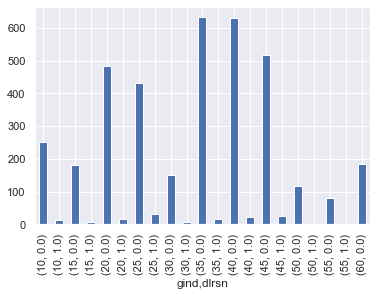

In [160]:
dfo.groupby(['gind','dlrsn'])['PERMCO'].nunique().plot(kind='bar')

In [161]:
CS = dfo[dfo['gind']=='25']

In [162]:
IT = dfo[dfo['gind']=='45']

In [163]:
FS = dfo[dfo['gind']=='40']

### CS

In [164]:
dlrsn_CS = CS.loc[:, ['PERMCO', 'fyear', 'dlrsn']]
NIMTA_CS = CS.loc[:, ['PERMCO', 'fyear', 'NIMTA']]
TLMTA_CS = CS.loc[:, ['PERMCO', 'fyear', 'TLMTA']]
CASHMTA_CS = CS.loc[:, ['PERMCO', 'fyear', 'CASHMTA']]
MB_CS = CS.loc[:, ['PERMCO', 'fyear', 'MB']]
SIGMA_CS = CS.loc[:, ['PERMCO', 'fyear', 'SIGMA']]
RSIZE_CS = CS.loc[:, ['PERMCO', 'fyear', 'RSIZE']]
EXRET_CS = CS.loc[:, ['PERMCO', 'fyear', 'EXRET']]
PRICE_CS = CS.loc[:, ['PERMCO', 'fyear', 'PRICE']]

In [165]:
varstr_CS = ['dlrsn', 'NIMTA', 'TLMTA', 'CASHMTA', 'MB', 'SIGMA', 'RSIZE', 'EXRET', 'PRICE']
var_CS = [dlrsn_CS, NIMTA_CS, TLMTA_CS, CASHMTA_CS, MB_CS, SIGMA_CS, RSIZE_CS, EXRET_CS, PRICE_CS]
varcols_CS = {c: [] for c in varstr_CS}

In [166]:
for i in list(range(9)):
    var_CS[i] = var_CS[i].set_index(['PERMCO','fyear'])[varstr_CS[i]].unstack()
    for y in years:
        varcols_CS[varstr_CS[i]].append('{}_{}'.format(varstr_CS[i], y))
    var_CS[i].columns = varcols_CS[varstr_CS[i]]

In [167]:
dlrsn_CS = var_CS[0]
NIMTA_CS = var_CS[1]
TLMTA_CS = var_CS[2]
CASHMTA_CS = var_CS[3]
MB_CS = var_CS[4]
SIGMA_CS = var_CS[5]
RSIZE_CS = var_CS[6]
EXRET_CS = var_CS[7]
PRICE_CS = var_CS[8]

In [168]:
X_CSdf = var_CS[1]
for df_ in var_CS[2:]:
    X_CSdf = X_CSdf.merge(df_, on='PERMCO')
X_CSdf.head()

,NIMTA_2000,NIMTA_2001,NIMTA_2002,NIMTA_2003,NIMTA_2004,NIMTA_2005,NIMTA_2006,NIMTA_2007,NIMTA_2008,NIMTA_2009,...,PRICE_2010,PRICE_2011,PRICE_2012,PRICE_2013,PRICE_2014,PRICE_2015,PRICE_2016,PRICE_2017,PRICE_2018,PRICE_2019
PERMCO,,,,,,,,,,,,,,,,,,,,,
614,0.094906,0.069148,0.061318,0.055151,0.059595,0.049261,0.045058,0.044532,0.045619,0.044884,...,2.574519,2.549836,2.525729,2.661657,2.661657,2.656055,2.708050,2.708050,2.708050,2.70805
676,0.043086,-0.011072,0.030812,-0.001878,0.026698,0.025104,0.017917,-0.044855,-0.248827,-0.153202,...,1.435085,2.013569,2.523326,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.70805
1354,0.008973,0.030671,0.055233,0.035235,0.044210,0.053021,0.020947,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1477,0.066239,0.050893,0.047211,0.049701,0.053821,0.067502,0.073340,0.095254,0.107557,0.069226,...,1.924249,1.611436,1.337629,1.121645,1.578050,2.404239,2.297573,2.708050,2.143589,0.00000
1519,0.101766,0.156542,0.084199,-0.006824,0.037702,0.134584,0.030800,-0.165899,-0.121003,0.130378,...,0.683097,0.463734,0.548121,0.641854,0.048790,-0.010151,0.048790,0.378368,0.364643,0.00000


In [169]:
Y_CSdf = var_CS[0][['dlrsn_2000']]
Y_CSdf.columns = ['dlrsn']
Y_CSdf.head()

,dlrsn
PERMCO,
614,0.0
676,0.0
1354,0.0
1477,0.0
1519,0.0


### IT

In [170]:
dlrsn_IT = IT.loc[:, ['PERMCO', 'fyear', 'dlrsn']]
NIMTA_IT = IT.loc[:, ['PERMCO', 'fyear', 'NIMTA']]
TLMTA_IT = IT.loc[:, ['PERMCO', 'fyear', 'TLMTA']]
CASHMTA_IT = IT.loc[:, ['PERMCO', 'fyear', 'CASHMTA']]
MB_IT = IT.loc[:, ['PERMCO', 'fyear', 'MB']]
SIGMA_IT = IT.loc[:, ['PERMCO', 'fyear', 'SIGMA']]
RSIZE_IT = IT.loc[:, ['PERMCO', 'fyear', 'RSIZE']]
EXRET_IT = IT.loc[:, ['PERMCO', 'fyear', 'EXRET']]
PRICE_IT = IT.loc[:, ['PERMCO', 'fyear', 'PRICE']]

In [171]:
varstr_IT = ['dlrsn', 'NIMTA', 'TLMTA', 'CASHMTA', 'MB', 'SIGMA', 'RSIZE', 'EXRET', 'PRICE']
var_IT = [dlrsn_IT, NIMTA_IT, TLMTA_IT, CASHMTA_IT, MB_IT, SIGMA_IT, RSIZE_IT, EXRET_IT, PRICE_IT]
varcols_IT = {c: [] for c in varstr_IT}

In [172]:
for i in list(range(9)):
    var_IT[i] = var_IT[i].set_index(['PERMCO','fyear'])[varstr_IT[i]].unstack()
    for y in years:
        varcols_IT[varstr_IT[i]].append('{}_{}'.format(varstr_IT[i], y))
    var_IT[i].columns = varcols_IT[varstr_IT[i]]

In [173]:
dlrsn_IT = var_IT[0]
NIMTA_IT = var_IT[1]
TLMTA_IT = var_IT[2]
CASHMTA_IT = var_IT[3]
MB_IT = var_IT[4]
SIGMA_IT = var_IT[5]
RSIZE_IT = var_IT[6]
EXRET_IT = var_IT[7]
PRICE_IT = var_IT[8]

In [174]:
X_ITdf = var_IT[1]
for df_ in var_IT[2:]:
    X_ITdf = X_ITdf.merge(df_, on='PERMCO')
X_ITdf.head()

,NIMTA_2000,NIMTA_2001,NIMTA_2002,NIMTA_2003,NIMTA_2004,NIMTA_2005,NIMTA_2006,NIMTA_2007,NIMTA_2008,NIMTA_2009,...,PRICE_2010,PRICE_2011,PRICE_2012,PRICE_2013,PRICE_2014,PRICE_2015,PRICE_2016,PRICE_2017,PRICE_2018,PRICE_2019
PERMCO,,,,,,,,,,,,,,,,,,,,,
7,0.069314,-0.003314,0.008774,0.006771,0.015213,0.027328,0.027225,0.024162,0.040449,0.045089,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.70805,2.70805,2.70805
194,0.044279,0.016901,0.009972,-0.003605,0.045219,0.042266,0.056107,0.057499,0.046553,-0.016207,...,2.642622,2.371178,2.437116,2.708050,2.708050,2.708050,2.708050,2.70805,2.70805,2.70805
211,0.141747,-0.008085,-0.242305,-0.029975,0.007223,0.009718,-0.009119,-0.263162,-0.347955,0.027149,...,2.101692,1.686399,0.875469,1.353255,0.982078,1.054312,2.428336,2.33020,2.70805,2.70805
282,0.023929,0.022491,0.008913,0.017325,0.035556,0.030387,0.048060,0.046078,0.114109,0.029654,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,2.70805,2.70805,2.70805
374,0.111733,0.004331,-0.033229,-0.024964,0.021595,-0.033463,0.026521,0.047525,0.028425,-0.076381,...,2.708050,2.708050,2.708050,2.708050,2.708050,0.000000,0.000000,0.00000,0.00000,0.00000


In [175]:
Y_ITdf = var_IT[0][['dlrsn_2000']]
Y_ITdf.columns = ['dlrsn']
Y_ITdf.head()

,dlrsn
PERMCO,
7,0.0
194,0.0
211,0.0
282,0.0
374,0.0


### FS

In [176]:
dlrsn_FS = FS.loc[:, ['PERMCO', 'fyear', 'dlrsn']]
NIMTA_FS = FS.loc[:, ['PERMCO', 'fyear', 'NIMTA']]
TLMTA_FS = FS.loc[:, ['PERMCO', 'fyear', 'TLMTA']]
CASHMTA_FS = FS.loc[:, ['PERMCO', 'fyear', 'CASHMTA']]
MB_FS = FS.loc[:, ['PERMCO', 'fyear', 'MB']]
SIGMA_FS = FS.loc[:, ['PERMCO', 'fyear', 'SIGMA']]
RSIZE_FS = FS.loc[:, ['PERMCO', 'fyear', 'RSIZE']]
EXRET_FS = FS.loc[:, ['PERMCO', 'fyear', 'EXRET']]
PRICE_FS = FS.loc[:, ['PERMCO', 'fyear', 'PRICE']]

In [177]:
varstr_FS = ['dlrsn', 'NIMTA', 'TLMTA', 'CASHMTA', 'MB', 'SIGMA', 'RSIZE', 'EXRET', 'PRICE']
var_FS = [dlrsn_FS, NIMTA_FS, TLMTA_FS, CASHMTA_FS, MB_FS, SIGMA_FS, RSIZE_FS, EXRET_FS, PRICE_FS]
varcols_FS = {c: [] for c in varstr_FS}

In [178]:
for i in list(range(9)):
    var_FS[i] = var_FS[i].set_index(['PERMCO','fyear'])[varstr_FS[i]].unstack()
    for y in years:
        varcols_FS[varstr_FS[i]].append('{}_{}'.format(varstr_FS[i], y))
    var_FS[i].columns = varcols_FS[varstr_FS[i]]

In [179]:
dlrsn_FS = var_FS[0]
NIMTA_FS = var_FS[1]
TLMTA_FS = var_FS[2]
CASHMTA_FS = var_FS[3]
MB_FS = var_FS[4]
SIGMA_FS = var_FS[5]
RSIZE_FS = var_FS[6]
EXRET_FS = var_FS[7]
PRICE_FS = var_FS[8]

In [180]:
X_FSdf = var_FS[1]
for df_ in var_FS[2:]:
    X_FSdf = X_FSdf.merge(df_, on='PERMCO')
X_FSdf.head()

,NIMTA_2000,NIMTA_2001,NIMTA_2002,NIMTA_2003,NIMTA_2004,NIMTA_2005,NIMTA_2006,NIMTA_2007,NIMTA_2008,NIMTA_2009,...,PRICE_2010,PRICE_2011,PRICE_2012,PRICE_2013,PRICE_2014,PRICE_2015,PRICE_2016,PRICE_2017,PRICE_2018,PRICE_2019
PERMCO,,,,,,,,,,,,,,,,,,,,,
5,0.010847,0.009687,-0.032162,0.016285,0.011216,-0.007254,0.020877,0.018085,-0.018689,-0.005663,...,0.708036,0.678034,1.128171,1.408545,1.393766,1.607436,1.410987,1.223775,0.879087,0.678034
90,0.013034,0.007027,0.014093,0.013479,0.013946,0.022323,0.019502,0.020157,0.019882,0.013483,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,0.000000,0.000000,0.000000,2.708050
92,0.013304,0.015184,0.015159,0.012666,0.018088,0.000000,0.020008,0.000000,0.013329,0.000000,...,0.000000,2.708050,0.000000,0.000000,0.000000,2.708050,0.000000,0.000000,0.000000,2.708050
137,0.011407,0.008317,0.008499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.708050,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,2.708050,2.708050
261,0.017137,0.006157,0.000000,0.000000,0.015938,0.013686,0.000000,0.000000,-0.009038,0.000000,...,2.708050,2.708050,2.708050,2.708050,2.708050,2.708050,0.000000,2.708050,2.708050,2.708050


In [181]:
Y_FSdf = var_FS[0][['dlrsn_2000']]
Y_FSdf.columns = ['dlrsn']
Y_FSdf.head()

,dlrsn
PERMCO,
5,0.0
90,0.0
92,0.0
137,0.0
261,0.0


In [182]:
#X_CSdf.to_csv('X_CS.csv')
#Y_CSdf.to_csv('Y_CS.csv')
#X_ITdf.to_csv('X_IT.csv')
#Y_ITdf.to_csv('Y_IT.csv')
#X_FSdf.to_csv('X_FS.csv')
#Y_FSdf.to_csv('Y_FS.csv')